Pitch: 

    1)Machine learnign will increasingly need to learn in real time as opposed to the current model of train-deploy iteration cycle. Need to automate those decisons. 
    2)Computation time of models becomes so big that needs to be traded-off with data collection. 
    
-> Need to consider time more importantly in machine learning. 
    

Problem 1): We consider the problem of optimizing a policy under a specific time and resource constraint while having access to a simulator. Querying a new data point has a cost as well as running a model. Balance each other to maximize the utility of the policy. Give it a non-equilibrium thermodynamics perspective. 

Non equilibrium thermodynamics: https://www.youtube.com/watch?v=10cVVHKCRWw 





The goal is to maximize the following constrained objective 

$\text{argmax}_{\pi} U(\pi)$ 

$ \sum_{i=1}^N t_i + c_i = T$

Where $c_i$ is the simulation time to get data and $t_i$ is the computation time of the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'Utility')

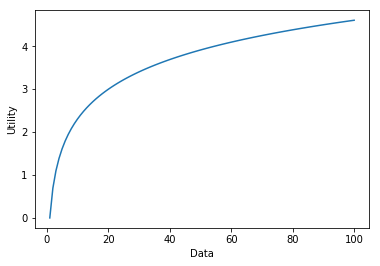

In [11]:
X = np.arange(100) +1 
y = np.log(X)
plt.plot(X,y)
plt.xlabel("Data")
plt.ylabel("Utility")

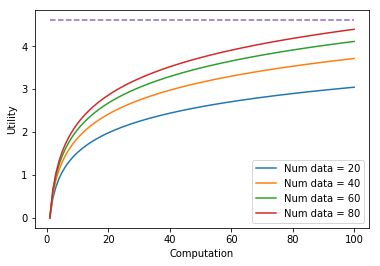

In [30]:
X_a = np.linspace(X_0,X_1,100)
for i in range(4):
    n = y.shape[0]//5
    y_a = np.interp(y, (y.min(), y.max()), (0, y[(i+1)*n]))
    plt.plot(X,y_a,label="Num data = "+str((1+i)*20))

plt.plot(X, [np.max(y)]*X.shape[0], '--')
plt.xlabel("Computation")
plt.ylabel("Utility")
plt.legend()

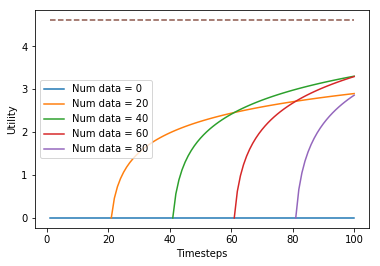

In [61]:
for i in range(5):
    n = y.shape[0]//5
    y_a = np.interp(y, (y.min(), y.max()), (0, y[(i)*n]))
    plt.plot(X[i*n:],y_a[:(100-i*n)],label="Num data = "+str((i)*20))

plt.plot(X, [np.max(y)]*X.shape[0], '--')
plt.xlabel("Timesteps")
plt.ylabel("Utility")
plt.legend()


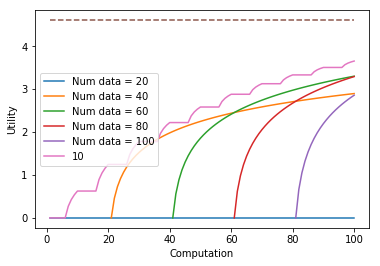

In [59]:
for i in range(5):
    n = y.shape[0]//5
    y_a = np.interp(y, (y.min(), y.max()), (0, y[(i)*n]))
    plt.plot(X[i*n:],y_a[:(100-i*n)],label="Num data = "+str((1+i)*20))

plt.plot(X, [np.max(y)]*X.shape[0], '--')
plt.xlabel("Computation")
plt.ylabel("Utility")
alternate = 10
prev_value = 0
num_data = 0
y_a = []
for i in range(100//alternate):
    y_a += [prev_value]*(alternate//2)
    num_data += (alternate//2)
    tmp = np.interp(y, (y.min(), y.max()), (y_a[-1], y[num_data]))
    y_a += list(tmp[:(alternate//2)])
    prev_value = y_a[-1]

plt.plot(X,y_a,label=str(alternate))
plt.legend()

![alt text](non-equi-screen.png "Title")



1) Similar phenomenom then fluctuation theorem. Shorter switching between data and collection is optimal <=> quasi static process loose less energy (discretization steps).

2) The key is in estimating the curves of growth of utility vs compute and utility versus data collection. Can probably use fluctuation quantity from crooks. Found a paper to estimate it (https://openreview.net/forum?id=rylJkpEtwS). Uncertainty will be key. Can use the formulation in (https://arxiv.org/abs/1604.02080)   

3) Theorems in non equilibrium thermodynamics that relates the amount of work needed to keep a system in a non-equilibrium states to the precision-uncertainty.



4) Same framework could be applied to other problem like distributed training. Communication channel goes to 0 quasi static process otherwise dissipated work. 


Problem 2): Underlying assumption that environment doesnt change when running computations. Can generalize the problem by considering real time env where things change while you compute. Additional layer of complexity. 

# ---

What if learning takes a lot of time like deep learning then the best isnt to trade off right away. Make a curve to demonstrate this.

Need to model the learning trajectory as a continuous time sde ? Stochastic because learning is stoch